In [136]:
%matplotlib widget

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, optimize
from roboticstoolbox import *
from spatialmath import *
import time
import math

In [138]:
L1 = -165
L2 = -165

# leg = ET2.R() * ET2.ty(L1) * ET2.R() * ET2.ty(L2)
link1 = Link(ET.Ry(), name="link1")
link2 = Link(ET.tz(L1) * ET.Ry(), name="link2", parent=link1)
link3 = Link(ET.tz(L2), name="link3", parent=link2)
leg = ERobot([link1, link2, link3], name="mybot")

BACK_LEG = True
seed = 2
if BACK_LEG:
    seed = 1

via = np.array([
    [25, 0, -250],
    [0, 0, -250],
    [-25, 0, -250],
    [0, 0, -250],
    [25, 0, -250],
])

timesegments = np.array([
    1,
    1,
    1,
    1,
])
dt = 0.01
traj = mstraj(via, tsegment=timesegments, dt=dt, tacc=0)
trajectory = traj.q

answer_arr = leg.ikine_LM(SE3.Trans(trajectory), mask=[1,0,1,0,0,0], seed=seed).q
q0 = answer_arr[:,0]
q1 = answer_arr[:,1]
trajectory.shape

(400, 3)

(400,)
(400,)


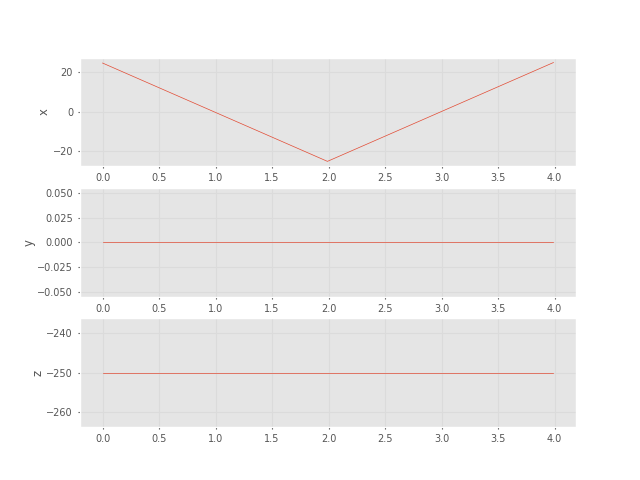

In [139]:
x_coords = trajectory[:,0]
y_coords = trajectory[:,1]
z_coords = trajectory[:,2]
t = np.arange(0, traj.t[-1]+dt, dt)

print(t.shape)
print(x_coords.shape)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.set_ylabel("x")
ax1.plot(t, x_coords)
ax2.set_ylabel("y")
ax2.plot(t, y_coords)
ax3.set_ylabel("z")
ax3.plot(t, z_coords)
plt.show()

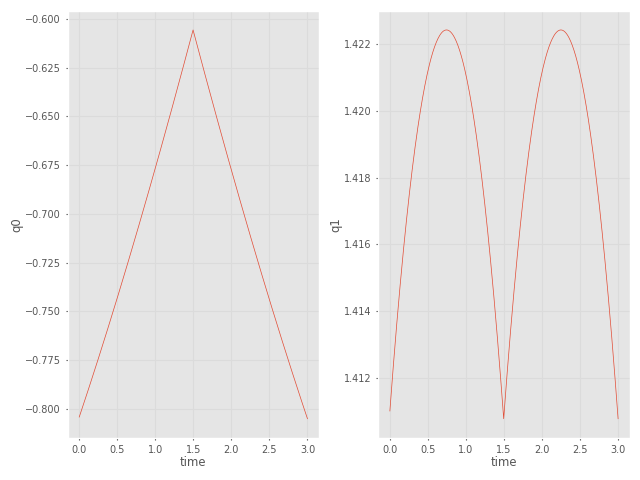

In [140]:
fig, ax = plt.subplots(1, 2)

ax[0].set_ylabel("q0")
ax[0].set_xlabel("time")
ax[0].plot(np.linspace(0, 3, answer_arr.shape[0]), q0)

ax[1].set_ylabel("q1")
ax[1].set_xlabel("time")
ax[1].plot(np.linspace(0, 3, answer_arr.shape[0]), q1)

plt.tight_layout()
plt.show()

In [141]:
with np.printoptions(threshold=np.inf):
    print(np.array2string(answer_arr, separator=","))

[[-0.80419115, 1.4110254 ],
 [-0.80331528, 1.41125444],
 [-0.80243805, 1.41148114],
 [-0.80155946, 1.41170551],
 [-0.80067952, 1.41192755],
 [-0.79979822, 1.41214725],
 [-0.79891558, 1.41236463],
 [-0.79803158, 1.41257967],
 [-0.79714624, 1.41279238],
 [-0.79625955, 1.41300275],
 [-0.79537152, 1.4132108 ],
 [-0.79448215, 1.41341651],
 [-0.79359144, 1.41361989],
 [-0.79269939, 1.41382095],
 [-0.79180601, 1.41401967],
 [-0.79091129, 1.41421606],
 [-0.79001525, 1.41441012],
 [-0.78911787, 1.41460185],
 [-0.78821917, 1.41479125],
 [-0.78731915, 1.41497832],
 [-0.7864178 , 1.41516306],
 [-0.78551513, 1.41534548],
 [-0.78461114, 1.41552556],
 [-0.78370584, 1.41570332],
 [-0.78279922, 1.41587875],
 [-0.78189129, 1.41605184],
 [-0.78098205, 1.41622262],
 [-0.7800715 , 1.41639106],
 [-0.77915964, 1.41655717],
 [-0.77824648, 1.41672096],
 [-0.77733202, 1.41688242],
 [-0.77641626, 1.41704156],
 [-0.7754992 , 1.41719836],
 [-0.77458084, 1.41735284],
 [-0.77366119, 1.417505  ],
 [-0.77274024, 1.417